In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('df_rolling_window_imputation.csv')
df

,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.other,appCat.social,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.05,2014-03-14,0.000000,15.121824,49.573057,4.144754,44.801875,58.581125,1.0,-1.00,2.00,8.0,63.892159,0.0
1,AS14.08,2014-03-14,0.000000,20.439069,15.310760,4.144754,8.451600,30.768107,1.0,-0.20,1.20,7.4,71.859192,1.0
2,AS14.13,2014-03-14,0.000000,19.142245,48.967200,50.052000,44.883815,36.115308,1.0,0.20,1.40,7.8,42.396488,1.0
3,AS14.15,2014-03-14,0.000000,22.450083,35.161000,27.098377,172.527000,41.821513,1.0,-0.25,0.50,6.5,81.015333,1.0
4,AS14.16,2014-03-14,0.000000,3.321333,6.877000,27.098377,29.064000,41.821513,1.0,-0.40,0.75,7.4,46.041000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,AS14.26,2014-05-15,0.141308,9.825879,67.822636,62.043000,5.873400,67.472417,1.0,0.20,0.20,6.4,167.927026,1.0
1186,AS14.27,2014-05-15,0.066597,9.856749,74.322233,99.372375,11.396467,105.163411,1.0,1.50,0.50,7.0,179.972857,1.0
1187,AS14.29,2014-05-15,0.066597,9.856749,74.322233,99.372375,11.396467,105.163411,1.0,-0.50,0.00,6.0,179.972857,1.0
1188,AS14.31,2014-05-15,0.097902,11.728533,98.076516,62.043000,9.883200,47.310646,1.0,0.50,1.00,7.0,147.924608,1.0


<Axes: xlabel='time'>

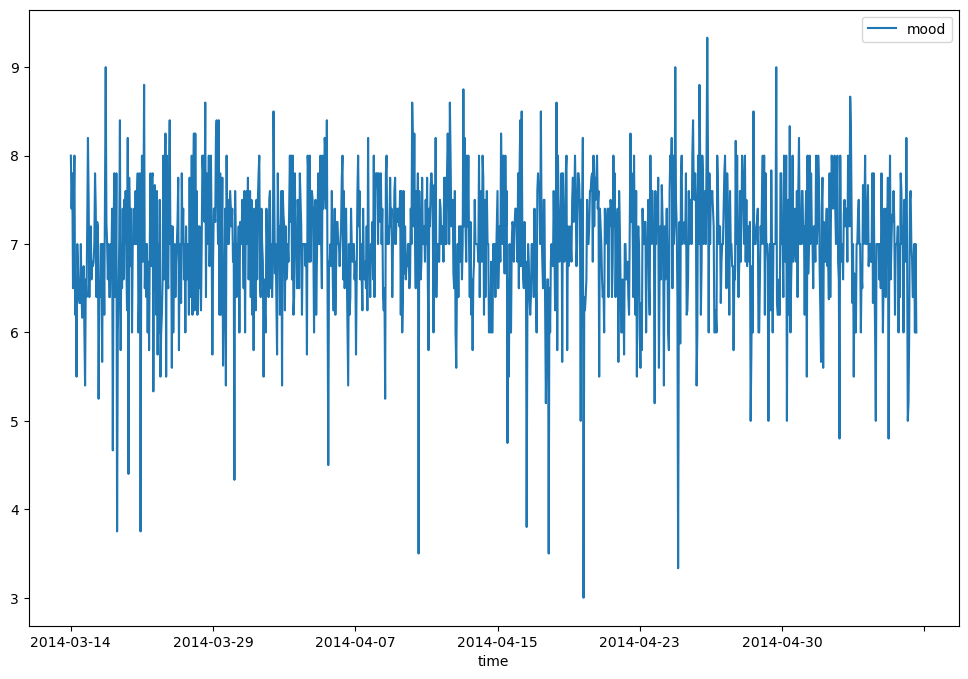

In [12]:
df.plot('time','mood',figsize=(12,8))

In [4]:
df.columns
df_subset = df[['activity', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.other', 'appCat.social', 'call',
       'circumplex.arousal', 'circumplex.valence', 'mood', 'screen', 'sms']]

In [5]:
df_subset

,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.other,appCat.social,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,0.000000,15.121824,49.573057,4.144754,44.801875,58.581125,1.0,-1.00,2.00,8.0,63.892159,0.0
1,0.000000,20.439069,15.310760,4.144754,8.451600,30.768107,1.0,-0.20,1.20,7.4,71.859192,1.0
2,0.000000,19.142245,48.967200,50.052000,44.883815,36.115308,1.0,0.20,1.40,7.8,42.396488,1.0
3,0.000000,22.450083,35.161000,27.098377,172.527000,41.821513,1.0,-0.25,0.50,6.5,81.015333,1.0
4,0.000000,3.321333,6.877000,27.098377,29.064000,41.821513,1.0,-0.40,0.75,7.4,46.041000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.141308,9.825879,67.822636,62.043000,5.873400,67.472417,1.0,0.20,0.20,6.4,167.927026,1.0
1186,0.066597,9.856749,74.322233,99.372375,11.396467,105.163411,1.0,1.50,0.50,7.0,179.972857,1.0
1187,0.066597,9.856749,74.322233,99.372375,11.396467,105.163411,1.0,-0.50,0.00,6.0,179.972857,1.0
1188,0.097902,11.728533,98.076516,62.043000,9.883200,47.310646,1.0,0.50,1.00,7.0,147.924608,1.0


## Determining relationships
---

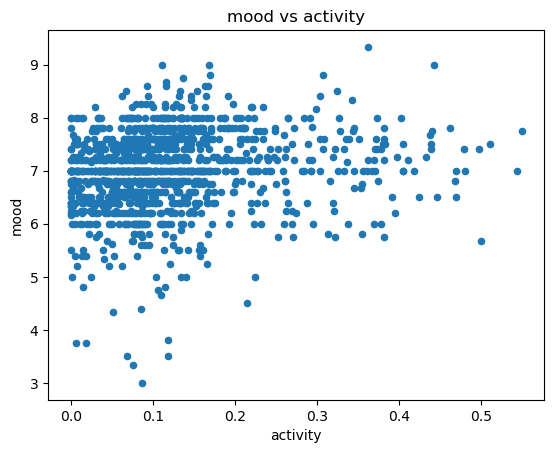

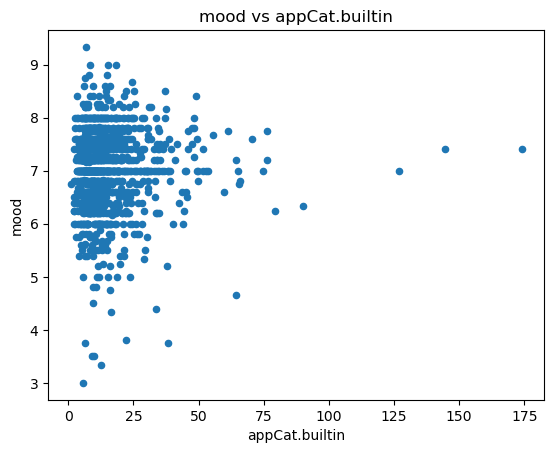

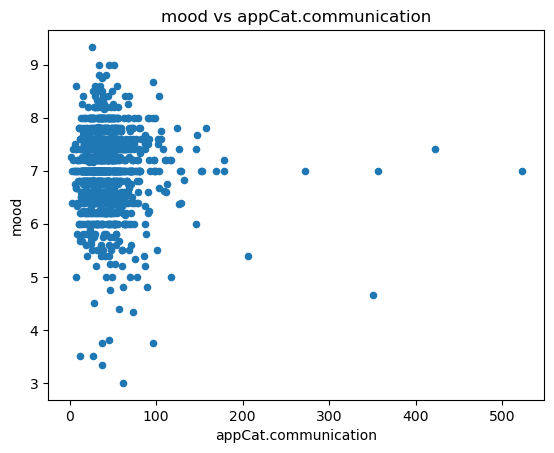

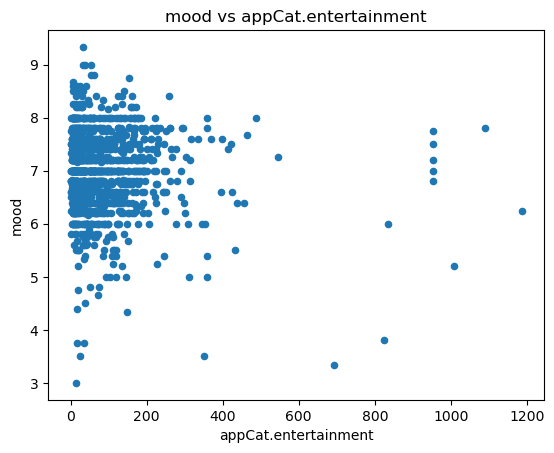

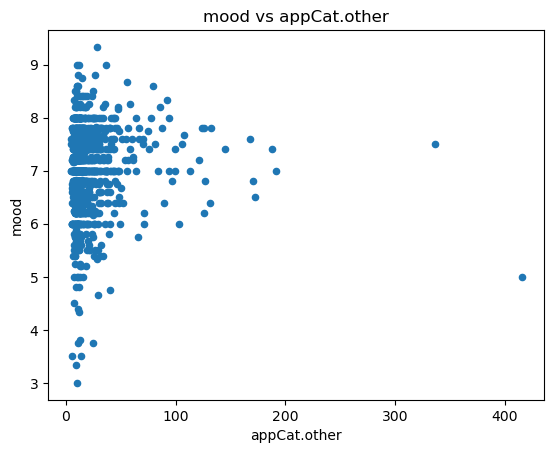

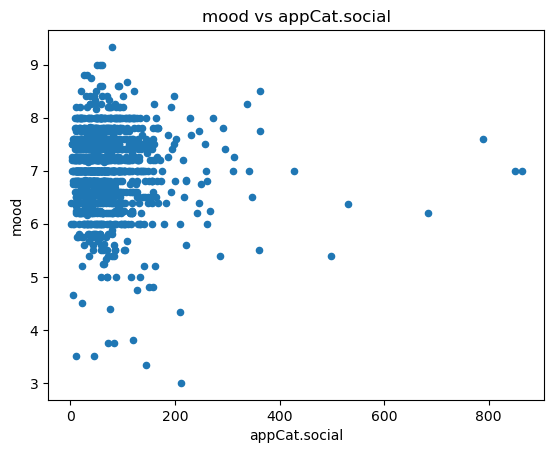

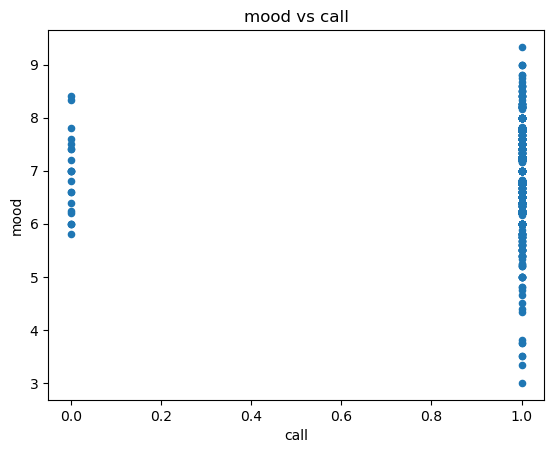

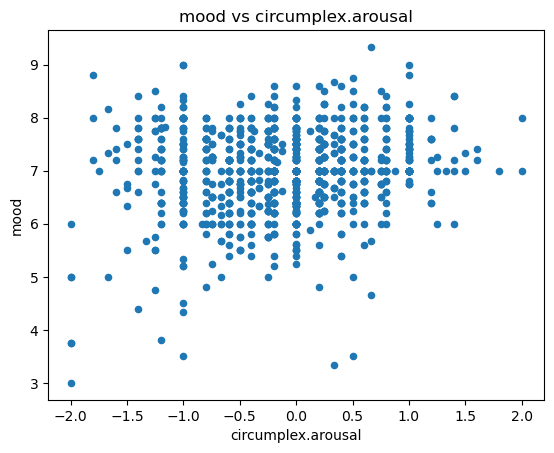

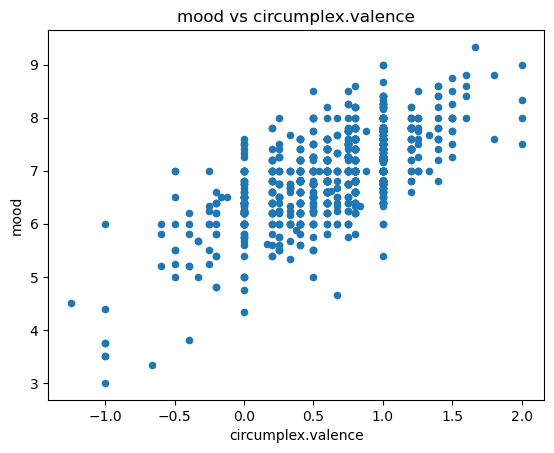

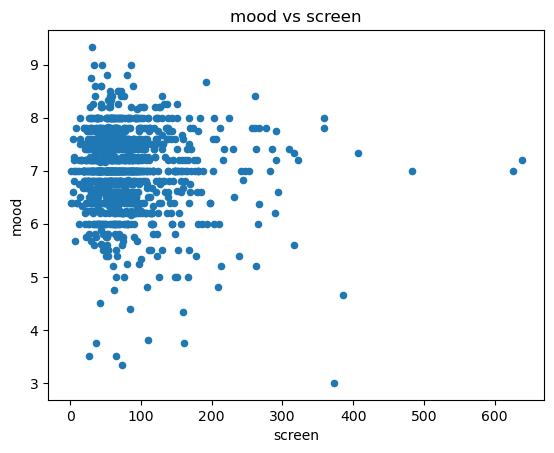

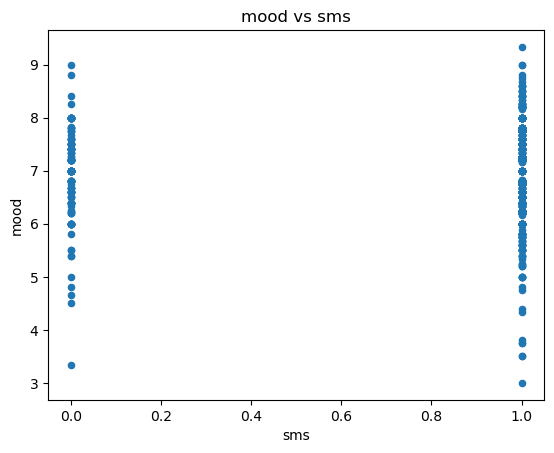

In [6]:

target = 'mood'
features = df_subset.columns.drop(target)  # This gets all column names except the target

# Create scatter plots
for feature in features:
    df.plot(kind='scatter', x=feature, y=target, title=f'{target} vs {feature}')
    plt.show()


## LSTM RNN
---

In [7]:
df.isna().sum()

id                      0
time                    0
activity                0
appCat.builtin          0
appCat.communication    0
appCat.entertainment    0
appCat.other            0
appCat.social           0
call                    0
circumplex.arousal      0
circumplex.valence      0
mood                    0
screen                  0
sms                     0
dtype: int64

* ### Pepare data for model

In [8]:
#Seperate train and test
x = df.drop(['id','time', 'mood'],axis=1) #Exclude time for now, but try including it later!
y = df['mood']

#Normalise data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Reshape data for model
time_steps = 1
x_scaled = np.array([x_scaled[i - time_steps:i, :] for i in range(time_steps, len(x_scaled) + 1)])
y[time_steps:] #Intuition: We are using day 1 to predict day 2, hence the y vector must start from day 2, as this is the predicted target using day 1's data 

#Split data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)




In [9]:
x_scaled

array([[[-1.24996375,  0.02867455,  0.17056313, ...,  3.02379747,
         -0.25651813, -2.51906312]],

       [[-1.24996375,  0.44555233, -0.87473143, ...,  1.18144341,
         -0.12022886,  0.39697298]],

       [[-1.24996375,  0.34387991,  0.15207929, ...,  1.64203192,
         -0.62423712,  0.39697298]],

       ...,

       [[-0.55500297, -0.38411293,  0.92562573, ..., -1.58208768,
          1.72923415,  0.39697298]],

       [[-0.22831769, -0.23736307,  1.65033555, ...,  0.72085489,
          1.18099587,  0.39697298]],

       [[ 0.02869542, -0.28797753,  0.07108629, ..., -0.43061639,
          0.61940056,  0.39697298]]])

* ### Setup model

In [10]:
# Initialize the LSTM model
model = Sequential()

# Add an LSTM layer with 50 units
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))  # input_shape = (timesteps (number of days of data), features per timestep (per day))

# Add a Dense layer for output
model.add(Dense(1, activation='linear'))  # Specifying that there must be ONE output layer that uses a linear function (which is required to output a single continuous variable)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Model summary
model.summary()

/Users/alex_1/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        12,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,451 (48.64 KB)

 Trainable params: 12,451 (48.64 KB)

 Non-trainable params: 0 (0.00 B)

* ###  Train model

In [11]:
model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=1)

Epoch 1/100


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.5799 - val_loss: 43.0234
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 40.6947 - val_loss: 31.1089
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 27.3249 - val_loss: 15.9170
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 13.2541 - val_loss: 5.7785
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 4.7217 - val_loss: 1.9376
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 1.6239 - val_loss: 1.0240
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.9657 - val_loss: 0.8452
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 0.7369 - val_loss: 0.7727
Epoch 9/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.6254 - val_loss: 0.7196
Epoch 10/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.5310 - val_loss: 0.6664
Epoch 11/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 0.5420 - val_loss: 0.6142
Epoch 12/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 718us

* ###  Evaluate model

In [12]:
loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2327

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.3468
Test Loss: 0.3335212171077728


## XG Boost
---

* ### Setup

In [15]:
df['Next Day Mood'] = df['mood'].shift(-1)
df = df.dropna()  

x = df.drop(['id','time', 'mood', 'Next Day Mood'],axis=1) #Exclude time for now, but try including it later!
y = df['Next Day Mood']

x_train, y_train = x.loc[df.index < 832], y.loc[df.index < 832]
x_test, y_test = x.iloc[832:1070], y.loc[832:1070]
x_validate, y_validate = x.iloc[1070:1189], y.loc[1070:1189 ]

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#NO NEED TO NORMALISE DATA NOW


,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.other,appCat.social,call,circumplex.arousal,circumplex.valence,screen,sms
0,0.000000,15.121824,49.573057,4.144754,44.801875,58.581125,1.0,-1.00,2.00,63.892159,0.0
1,0.000000,20.439069,15.310760,4.144754,8.451600,30.768107,1.0,-0.20,1.20,71.859192,1.0
2,0.000000,19.142245,48.967200,50.052000,44.883815,36.115308,1.0,0.20,1.40,42.396488,1.0
3,0.000000,22.450083,35.161000,27.098377,172.527000,41.821513,1.0,-0.25,0.50,81.015333,1.0
4,0.000000,3.321333,6.877000,27.098377,29.064000,41.821513,1.0,-0.40,0.75,46.041000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1174,0.070833,6.463536,43.404271,36.834812,9.468800,36.730783,1.0,0.80,0.40,38.335547,1.0
1175,0.115248,6.278450,48.245785,26.623500,85.294667,75.878681,1.0,0.60,0.80,103.023024,1.0
1176,0.092558,9.366336,43.880664,33.123583,27.797517,52.394797,1.0,1.00,1.00,72.740332,1.0
1177,0.139964,18.559481,117.318162,102.675250,13.182667,70.495191,1.0,0.50,0.00,147.320176,1.0


* ### Define model

In [21]:
# Define the model
modelXGB = xgb.XGBRegressor(n_estimators=100, verbosity=1)

# Fit the model and track progress on a validation set
eval_set = [(x_train, y_train), (x_test, y_test)]
modelXGB.fit(x_train, y_train, eval_set=eval_set, eval_metric="rmse", verbose=True)

[0]	validation_0-rmse:0.67083	validation_1-rmse:0.81140
[1]	validation_0-rmse:0.62247	validation_1-rmse:0.80634
[2]	validation_0-rmse:0.58306	validation_1-rmse:0.80588
[3]	validation_0-rmse:0.55920	validation_1-rmse:0.81266
[4]	validation_0-rmse:0.52116	validation_1-rmse:0.81549
[5]	validation_0-rmse:0.50007	validation_1-rmse:0.81848
[6]	validation_0-rmse:0.48220	validation_1-rmse:0.81946
[7]	validation_0-rmse:0.46192	validation_1-rmse:0.82487
[8]	validation_0-rmse:0.44040	validation_1-rmse:0.82182
[9]	validation_0-rmse:0.42642	validation_1-rmse:0.81789
[10]	validation_0-rmse:0.40005	validation_1-rmse:0.81994
[11]	validation_0-rmse:0.39188	validation_1-rmse:0.81764
[12]	validation_0-rmse:0.38247	validation_1-rmse:0.81839
[13]	validation_0-rmse:0.37689	validation_1-rmse:0.81697
[14]	validation_0-rmse:0.36199	validation_1-rmse:0.81396
[15]	validation_0-rmse:0.34832	validation_1-rmse:0.81326
[16]	validation_0-rmse:0.34124	validation_1-rmse:0.81320
[17]	validation_0-rmse:0.33302	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

* ### Train model

In [15]:
modelXGB.fit(x_train, y_train, verbose=True)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

* ### Predict

In [16]:
y_pred = modelXGB.predict(x_test)

* ### Evaluate

In [17]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

MSE:  0.6354316289349646
RMSE:  0.7971396545994714
